# Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

# LOADING THE DATASET

In [2]:
# train data
train_data=pd.read_excel('flight_train.xlsx')

In [3]:
# test data
test_data=pd.read_excel('flight_test.xlsx')

# TRAIN DATA

In [4]:
pd.set_option('display.max_columns',None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Top 5 heads of the dataset.

In [5]:
train_data.shape

(10683, 11)

10683 rows and 11 columns in the train dataset.

# EXPLORATORY DATA ANALYSIS TRAIN DATA

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


1 integer datatype column and 10 object datatype columns.

In [7]:
# checking null values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

one null value in Route column and one null value in Total_Stops column.

In [8]:
# Dropping null values
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now no null values in the dataset.

In [10]:
# Date_of_journey is a object data type, so converting into time stamp.
# We will extract  only day of that date then extract only month of the date

train_data['Journey_day']=pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data['Journey_month']=pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Now two columns added in the dataset Journey_day and Journey_month.

In [12]:
# Now dropping Date of journey column because data is of the same year and we have taken out date and the month.
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [13]:
# Now extracting hours and minutes from Dep_hour column
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute

In [14]:
# Now dropping the Dep_time column
train_data.drop('Dep_Time',axis=1,inplace=True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Now 2 more column has been added Dep_hour and Dep_min

In [16]:
# Extracting hours and minutes from Arrival_Time column
train_data['Arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [17]:
# Now dropping Arrival_Time column
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Now 2 more columns has been added in the dataset Arrival_hour and Arrival_min.

# HANDLING CATEGORICAL DATA

In [19]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Jet Airways has maximum number of counts.

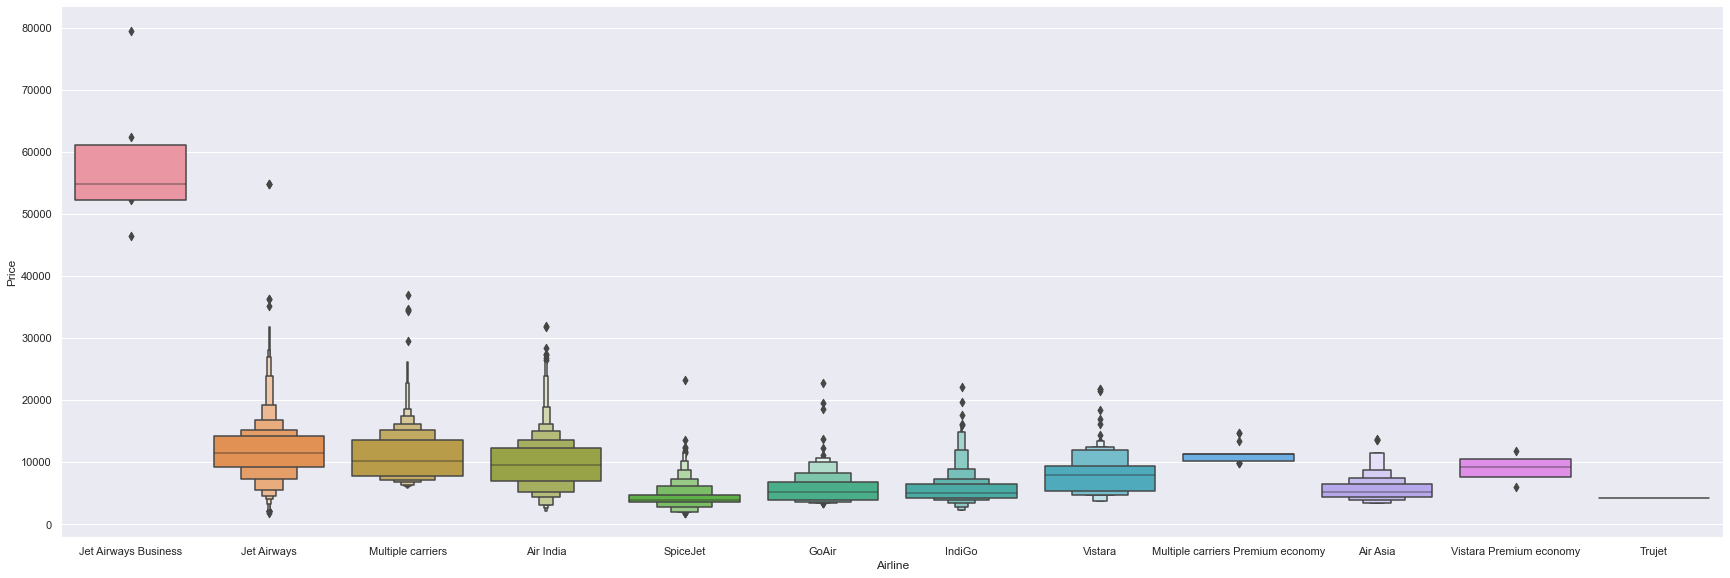

In [20]:
# Checking relationship between Airline and Price
sns.catplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False),height=8, aspect=3, kind='boxen')

Jet Airways has highest price and all the prices are almost same for remaining airlines.


In [21]:
# Converting Airline column into numeric column
Airline=train_data[['Airline']]

Airline=pd.get_dummies(Airline)

Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [22]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Delhi has maximum number of counts that is 4536.

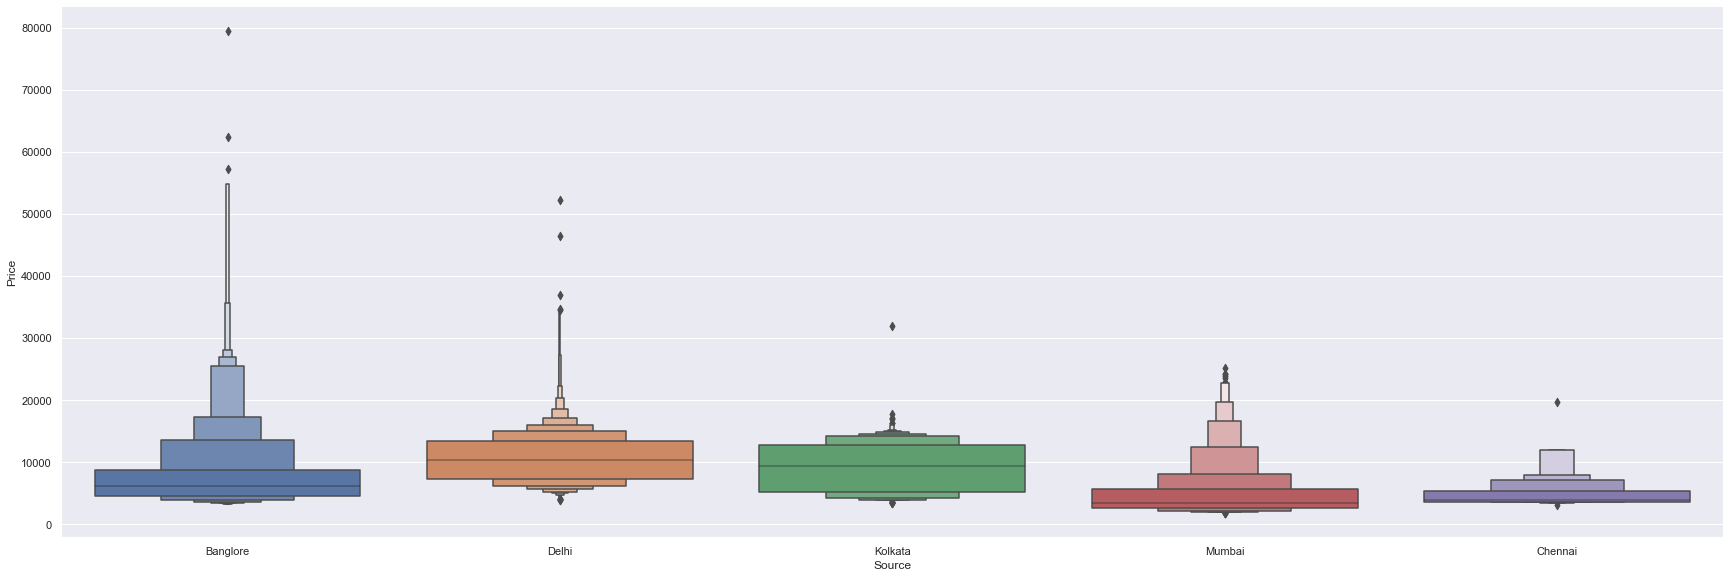

In [23]:
# Checking relationship between source and Price
sns.catplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False),height=8, aspect=3, kind='boxen')

Prices from Bangalore is maximum and all are looking almost similar.

In [24]:
# converting source column into numeric column
Source=train_data[['Source']]

Source=pd.get_dummies(Source)

Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [25]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Cochin has most number of counts.

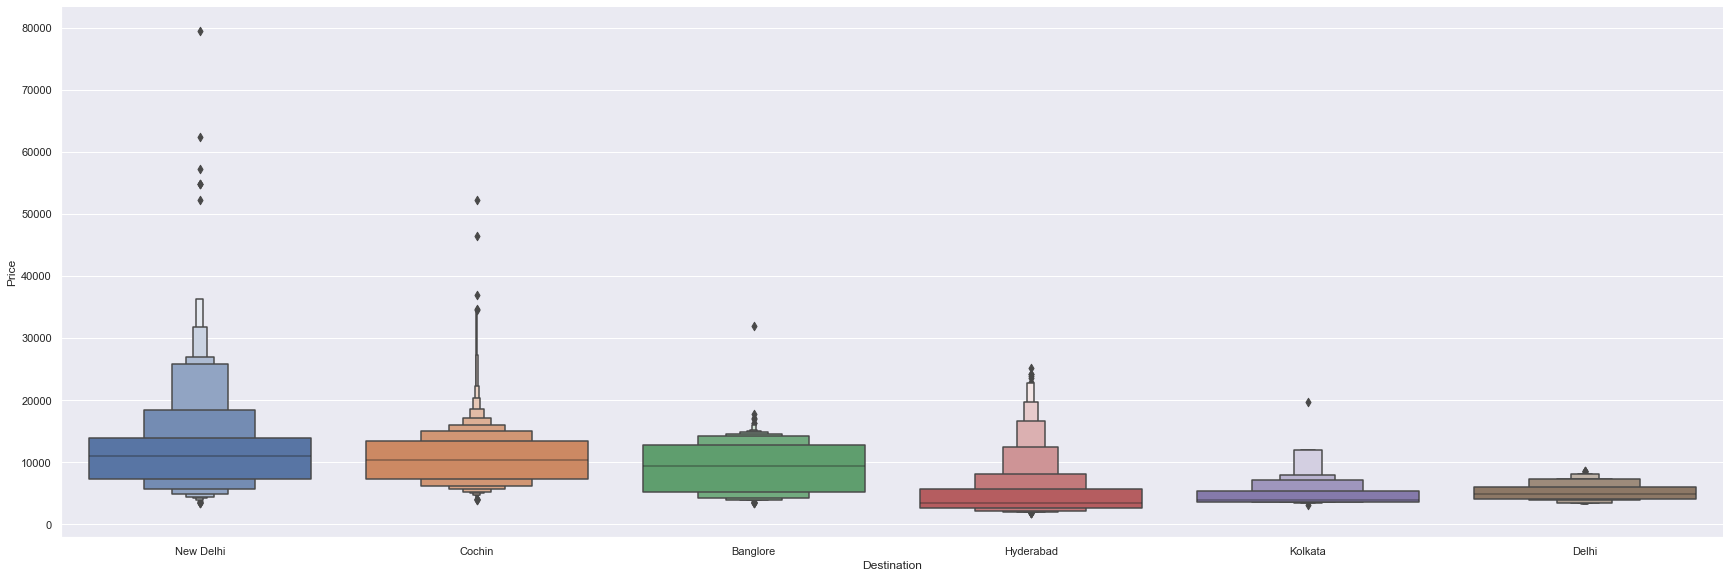

In [26]:
# Checking relationship between Destination and Price
sns.catplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False),height=8, aspect=3, kind='boxen')

Some outliers is in New Delhi and all are looking almost same.

In [27]:
# converting Destination column into numeric column
Destination=train_data[['Destination']]

Destination=pd.get_dummies(Destination)

Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [28]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [29]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

maximum number of counts is for 1 stop.

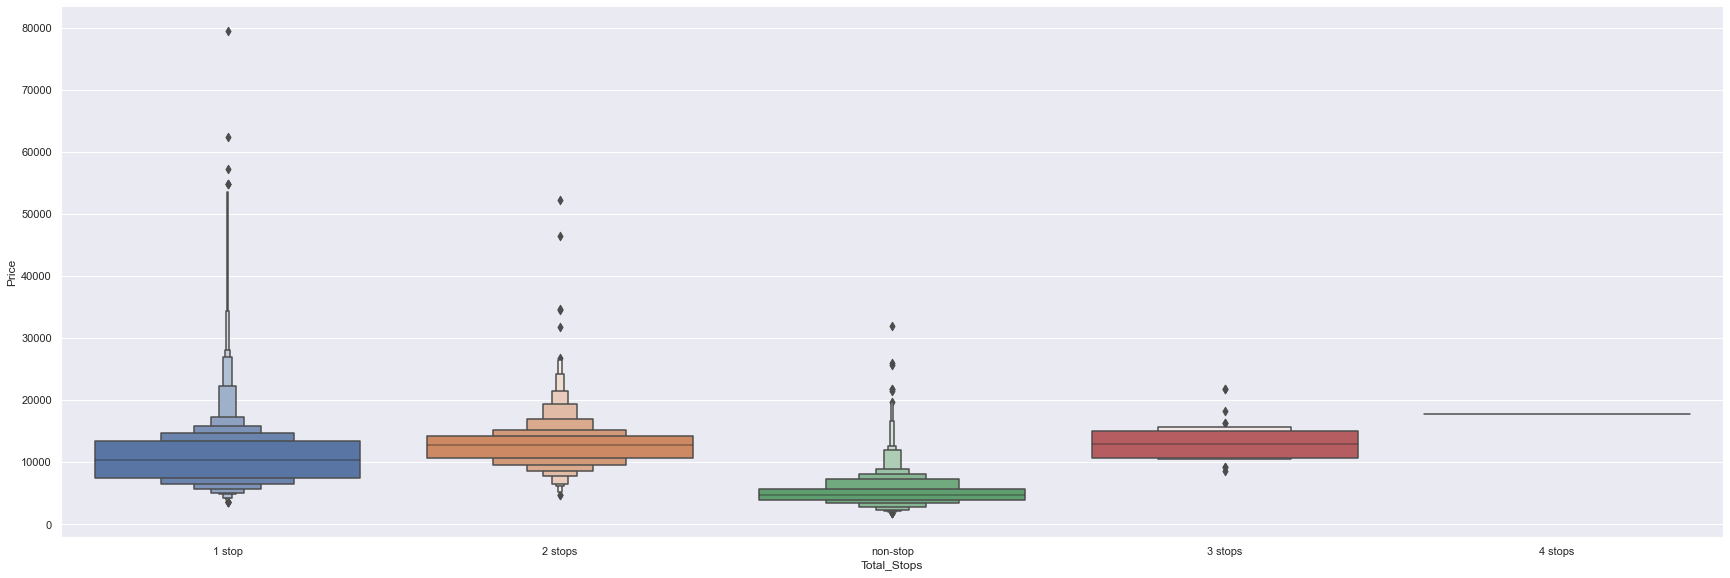

In [30]:
# Checking relationship between Total_Stops and Price
sns.catplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False),height=8, aspect=3, kind='boxen')

2 stops has increased price.

In [31]:
# Route and Total_Stops is showing the same thing so we can drop it
# Additional_Info column has no_info , so we can also drop it

train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [32]:
# converting Total_stops column into numeric column

train_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [33]:
# Now concatenating the dataset
data_train=pd.concat([train_data, Airline, Source, Destination],axis =1)

In [34]:
# Now dropping the columns which not required
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [35]:
# converting the remaining column column into numeric column
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data_train.columns:    
        if data_train[i].dtypes=='object':
            data_train[i]=enc.fit_transform(data_train[i])
            

In [36]:
data_train.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,240,0,3897,24,3,22,20,1,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,336,2,7662,1,5,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,106,2,13882,9,6,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,311,1,6218,12,5,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,303,1,13302,1,3,16,50,21,35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [37]:
data_train.shape

(10682, 32)

Now we have 10682 rows and 32 columns.

# TEST DATA

In [38]:
test_data=pd.read_excel('Flight_test.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# EXPLORATORY DATA ANALYSIS TEST DATA

In [39]:
test_data.shape

(2671, 10)

2761 rows and 10 columns in the test dataset.

In [40]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


10 object data type columns.

In [41]:
# checking null values
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null values in the dataset.

In [42]:
# Date_of_journey is a object data type, so converting into time stamp.
# We will extract  only day of that date then extract only month of the date

test_data['Journey_day']=pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data['Journey_month']=pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [43]:
# Now dropping Date of journey column because data is of the same year and we have taken out date and the month.
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [44]:
# Now extracting hours and minutes from Dep_hour column
test_data['Dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute

In [45]:
# Now dropping the Dep_time column
test_data.drop('Dep_Time',axis=1,inplace=True)

In [46]:
# Extracting hours and minutes from Arrival_Time column
test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [47]:
# Now dropping Arrival_Time column
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [48]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


Now we can see 6 columns has been added .

# HANDLING CATEGORICAL DATA

In [49]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Jet Airways has 897 counts that is maximum.

In [50]:
# Converting Airline column into numeric column
Airline=test_data[['Airline']]

Airline=pd.get_dummies(Airline)

Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [51]:
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Delhi has maximum number of counts that 1145.

In [52]:
# converting source column into numeric column
Source=test_data[['Source']]

Source=pd.get_dummies(Source)

Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [53]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

cochin is showing maximum numbers that is 1145.

In [54]:
# converting Destination column into numeric column
Destination=test_data[['Destination']]

Destination=pd.get_dummies(Destination)

Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [55]:
test_data['Route']

0       DEL → BOM → COK
1       CCU → MAA → BLR
2       DEL → BOM → COK
3       DEL → BOM → COK
4             BLR → DEL
             ...       
2666    CCU → DEL → BLR
2667          CCU → BLR
2668    DEL → BOM → COK
2669    DEL → BOM → COK
2670    DEL → BOM → COK
Name: Route, Length: 2671, dtype: object

In [56]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

1 stop is showing maximum numbers that is 1431.

In [57]:
# Route and Total_Stops is showing the same thing so we can drop it
# Additional_Info column has no_info , so we can also drop it

test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [58]:
# converting Total_stops column into numeric column

test_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [59]:
# Now concatenating the dataset
data_test=pd.concat([test_data, Airline, Source, Destination],axis =1)

In [60]:
# Now dropping the columns which not required
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [61]:
# converting the remaining column column into numeric column
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data_test.columns:    
        if data_test[i].dtypes=='object':
            data_test[i]=enc.fit_transform(data_test[i])
            

In [62]:
data_test.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,10,1,6,6,17,30,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,248,1,12,5,6,20,10,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,148,1,21,5,19,15,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,36,1,21,5,8,0,21,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,216,0,24,6,23,55,2,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [63]:
data_test.shape

(2671, 30)

Now we have 2671 rows and 30 columns in the test dataset.

# SPLITTING THE DATASET

In [64]:
data_train.shape

(10682, 32)

In [65]:
data_train.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [66]:
# Now combinining all the columns in x variable Except Price column beacuse it is the target column
X =data_train.loc[:,['Duration', 'Total_Stops', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi' ]]


In [67]:
X.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,240,0,24,3,22,20,1,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,336,2,1,5,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,106,2,9,6,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,311,1,12,5,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,303,1,1,3,16,50,21,35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [68]:
y=data_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# CHECKING CORRELATION

<AxesSubplot:>

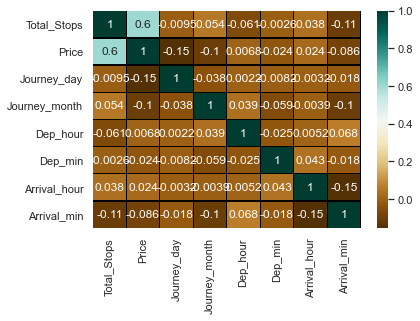

In [69]:
sns.heatmap(train_data.corr(),annot=True,cmap='BrBG',linewidth=.2,linecolor='Black')

Columns are not showing good correlation with price column, only Total_Stops is showing positive correlation with price column.

Arrival_hour is negatively correlated with Arrival_min.

Arrival_min is negatively correlated with Total_STops.

Journey_Day and Journey_month is showing negative correlation with price column.


# STATISTICAL SUMMARY

In [70]:
train_data.describe()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


count is same for all the columns.

Mean and median(50%)  is almost equall in every columns.

There is not much difference between 75% and max in any column except price(target column.)

# CHECKING OUTLIERS

Total_Stops         AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Price            AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
Journey_day      AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
Journey_month    AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
Dep_hour         AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
Dep_min          AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
Arrival_hour     AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
Arrival_min      AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
dtype: object

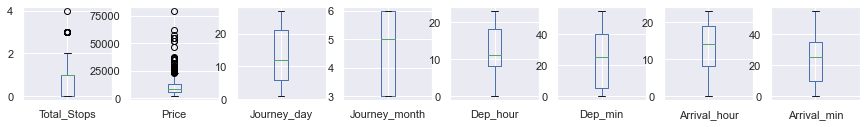

In [71]:
train_data.plot(kind='box',subplots=True, layout=(5,8), figsize=(15,10))

Not much outlier is present in any of the column , some outliers are present in Total_stops column, and Outliers are present in the target column price.

so on target column outlier will not be treated and in Total_Stops column the outlier will not treated due to chances of data loss.

In [72]:
# IMPORTING FEATURE 
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(X,y)

ExtraTreesRegressor()

[2.80305340e-02 2.91324336e-01 1.43597790e-01 5.45225205e-02
 2.61321674e-02 2.64690471e-02 3.15991114e-02 2.26008254e-02
 1.30868272e-03 1.33239323e-02 1.43115002e-03 1.77451415e-02
 1.56379559e-01 6.70863461e-02 1.84393835e-02 8.98324452e-04
 2.92566636e-03 1.67728030e-04 6.18360665e-03 9.14892351e-05
 8.55081677e-03 4.97499726e-04 1.36958810e-02 1.90756573e-03
 7.08334582e-03 1.72797715e-03 1.43403575e-02 1.84004370e-02
 6.66073301e-03 4.01589336e-04 1.64764548e-02]


<AxesSubplot:>

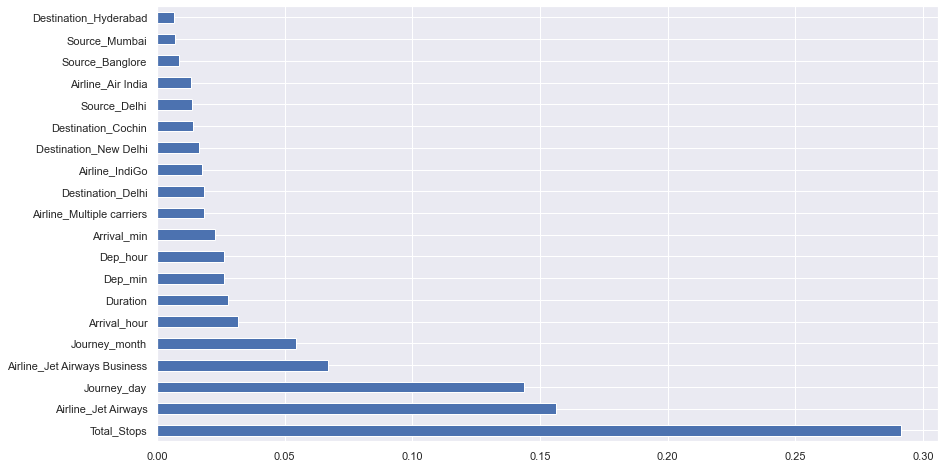

In [73]:
# showing import feature
print(ETR.feature_importances_)
plt.figure(figsize=(14,8))
imp=pd.Series(ETR.feature_importances_, index=X.columns)
imp.nlargest(20).plot(kind='barh')



Total_stops is important feature for the dataset.

 # Lets bring all features to a common scale

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(data_train)

x=pd.DataFrame(x,columns=data_train.columns)

# TRAIN TEST SPLIT


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

# MODEL BUILDING

In [76]:
# importing libraries
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge ,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:



#for Linear Regression

lr=LinearRegression()
lr.fit(X_train,y_train)
pred_y=lr.predict(X_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.6562664645799114
error
mean absolute error 1944.3110648853612
mean squared error 7877818.839948185
root mean squared error 2806.7452395876944


In [78]:
# For Linear Regression (cross validation)


score=cross_val_score(lr,X,y,cv=10)
print('cv score',np.mean(score))


cv score 0.6193759791291418


r2 score is 65% and cv score is 61% for linear regression.

# REGULARIZATION

In [79]:
# for Lasso

ls=Lasso()

ls.fit(X_train,y_train)
pred_y=ls.predict(X_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.6562334243195462
error
mean absolute error 1941.6045316981701
mean squared error 7878576.069484326
root mean squared error 2806.880130943309


In [80]:
# For Lasso (cross validation)


score=cross_val_score(ls,X,y,cv=10)
print('cv score',np.mean(score))

cv score 0.6195610062782982


r2 score is 65% and cv score is 61%.

In [154]:


#For Ridge

rd=Ridge()

rd.fit(X_train,y_train)
pred_y=rd.predict(X_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))



r2 score 0.649169372683825
error
mean absolute error 1945.9306550608542
mean squared error 8040472.752024306
root mean squared error 2835.572737918092


In [155]:
# For Ridge (cross  validation)


score=cross_val_score(rd,X,y,cv=10)
print('cv score',np.mean(score))

cv score 0.6187602047216146


r2 score is 64% and cv score is 61%.

In [145]:
#For ElasticNet



en=ElasticNet()

en.fit(X_train,y_train)
pred_y=en.predict(X_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.4107067129078681
error
mean absolute error 2536.4687518717587
mean squared error 13505652.724968547
root mean squared error 3675.0037721026283


In [146]:

#For ElasticNet (cross validation)

score=cross_val_score(en,X,y,cv=10)
print('cv score',np.mean(score))

cv score 0.42596295436116527


r2 score is 41% and cv score is 42%.

# CLASSIFICATION ALGORITH FOR REGRESSION

In [162]:
from sklearn.neighbors import KNeighborsRegressor

In [170]:
knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
y_pred=knr.predict(X_test)
knr.score(X_train,y_train)


0.7016119520470643

In [171]:
knr.score(X_test,y_test)

0.5428593824763086

# HYPER PARAMETER TUNING

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [82]:
clf = ls
parameters={'fit_intercept':['bool']}
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'fit_intercept': 'bool'}


In [83]:
# FINAL MODEL
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_decision=ls.predict(X_test)

lfs=r2_score(y_test,pred_decision)
print('r2 score:', lfs*100)

lsscore=cross_val_score(ls,X,y,cv=5)
lsc=lsscore.mean()
print('cross val score:',lsc*100)

r2 score: 65.62334243195463
cross val score: 61.97758214043988


# SAVING THE MODEL

In [84]:
import pickle
filename='flight_price.pkl'
pickle.dump(ls, open(filename, 'wb'))

In [85]:
loaded_model=pickle.load(open('flight_price.pkl','rb'))
result=loaded_model.score(X_test, y_test)
print(result)

0.6562334243195462


In [86]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion
                

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

Above predictions from the model , we are getting 65.73% accuracy .

# PREDICTING ON TEST DATA

In [93]:
x_test=data_test

In [94]:
x_test.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,10,1,6,6,17,30,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,248,1,12,5,6,20,10,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,148,1,21,5,19,15,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,36,1,21,5,8,0,21,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,216,0,24,6,23,55,2,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [95]:
model=Lasso()
model.fit(X,y)

Lasso()

In [197]:
pred=model.predict(x_test)
r2_score(y_test,pred)

0.6573185228679173

# SAVING THE RESULT ON THE CSV FILE

In [198]:
result=pd.DataFrame()


result["Fare"]=y_prediction
result=result.sort_index()
result.to_csv('flight_price.csv',index=True)

In [199]:
# Now Loding the data
ds=pd.read_csv('flight_price.csv')
ds

,Unnamed: 0,Fare
0,0,13312.709083
1,1,13221.519094
2,2,8685.651056
3,3,9925.388285
4,4,4867.743362
...,...,...
2666,2666,11551.064639
2667,2667,10274.497170
2668,2668,14463.182208
2669,2669,9150.427473


 # CONCLUSION

With the help of project , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on price.
.

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.

​